In [1]:
!pip install plotly

In [2]:
# plot.express
# plotly.graph_objects

import plotly.express as px

iris_df = px.data.iris()
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [4]:
# 품종별로 색깔을 구분

fig = px.scatter(iris_df, x='sepal_length', y='petal_width', color='species', title='Scatter Plot')
fig.show()

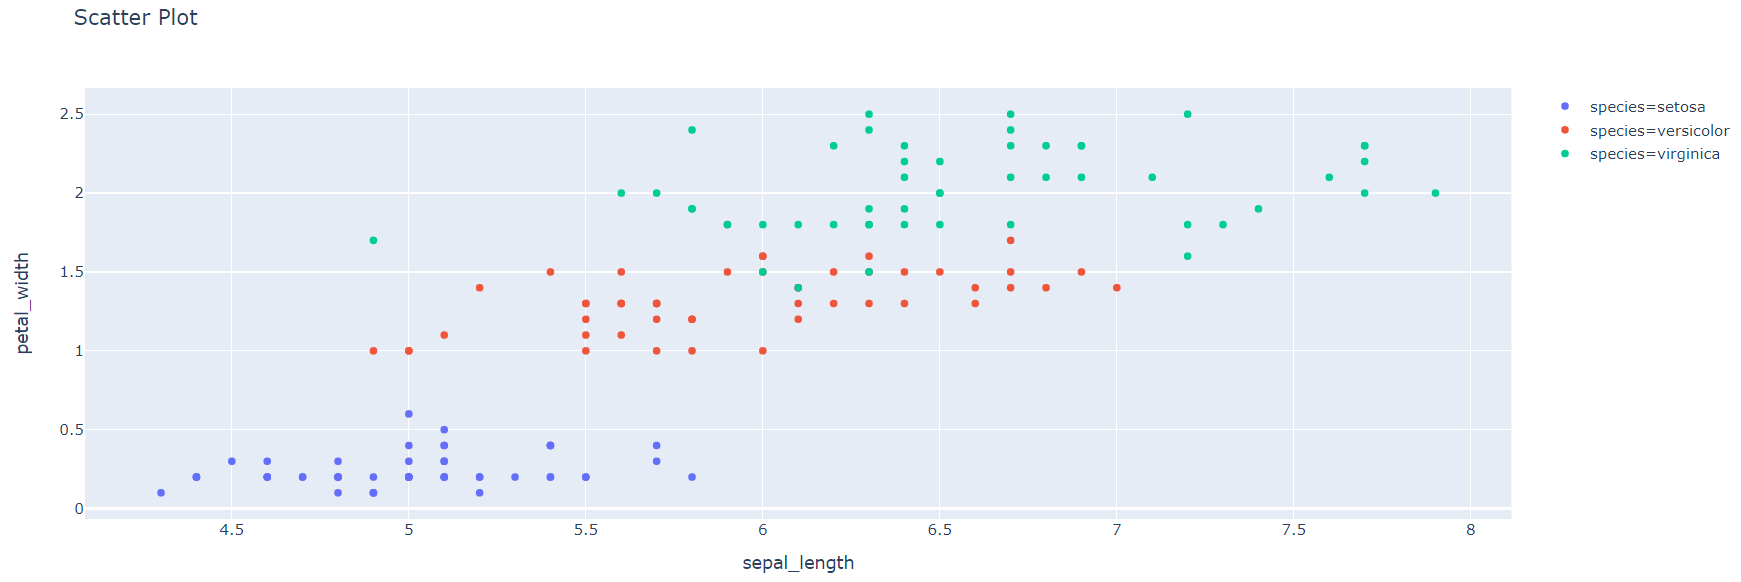

In [5]:
# x축 상단에 sepal_length에 대한 box-whisker 플롯을 color=에 지정된 클래스별로 그리기 위해 marginal_x = 'box'를 부여하고
# y축에는 petal_width의 분포 형태를 그리기 위해 marginal_y = 'violin'을 부여함.

# violin : 분포함수를 좌우 대칭 형태로 그린 플롯

fig = px.scatter(iris_df, 
                 x='sepal_length', # x축 sepal_length
                 y='petal_width', # y축 petal_width
                 color='species', # 
                 marginal_y='violin', # violin : 분포함수를 좌우대칭 형태로 그린 플롯  
                 marginal_x='box', # box-whisker 플롯  
                 trendline='ols', # 클래스별로 OLS 회귀선
                 template='simple_white' # 그림의 배경이 흰색
                 )

fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



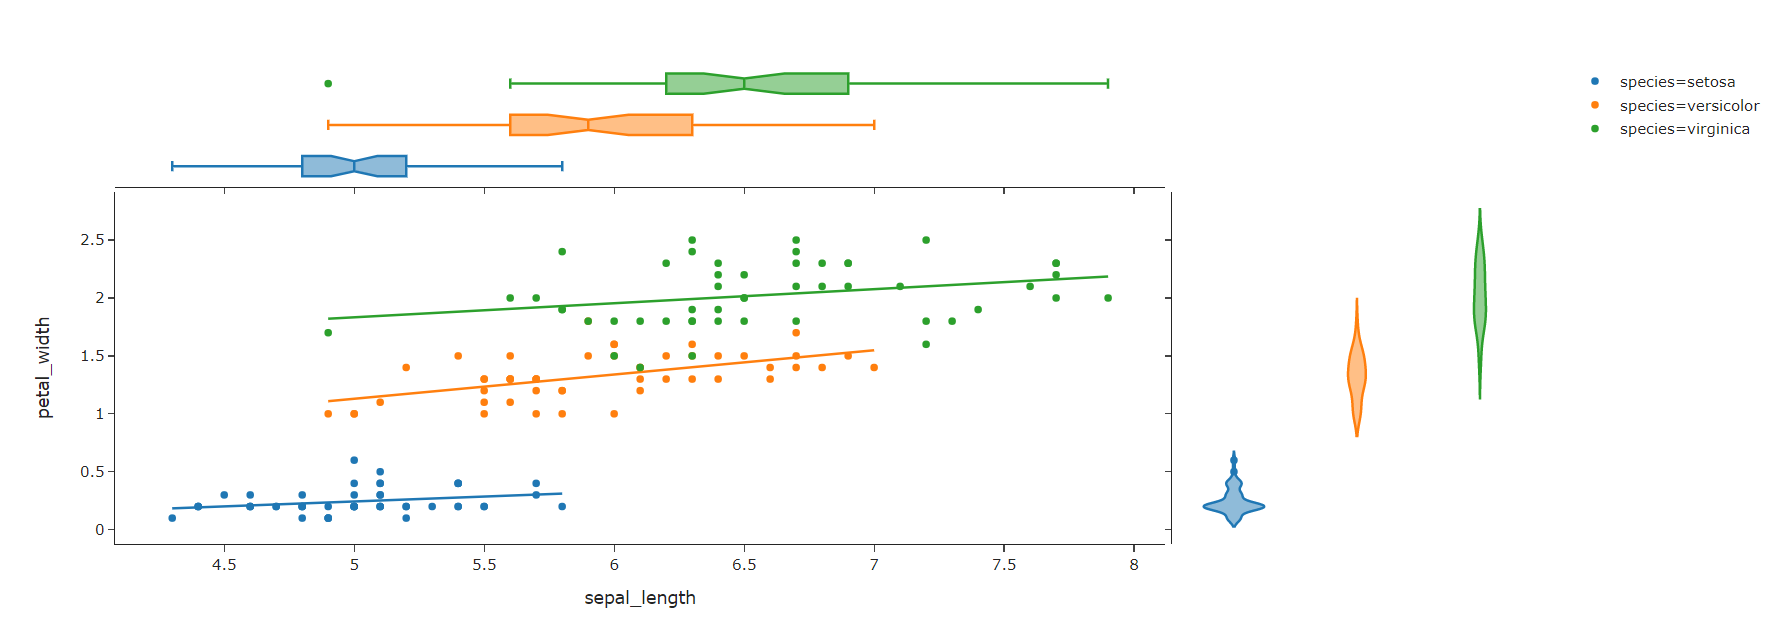

In [6]:
# 모든 가능한 특성변수의 pair로 플롯을 그림
# IRIS 품종을 분류하는 데 유용한 변수선택과 분류를 선형모형으로 할지, 비선형모형으로 할지 결정하는데 유용

fig = px.scatter_matrix(iris_df,
                        dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        color='species',
                        title='Scatter Matrix')

fig.show()

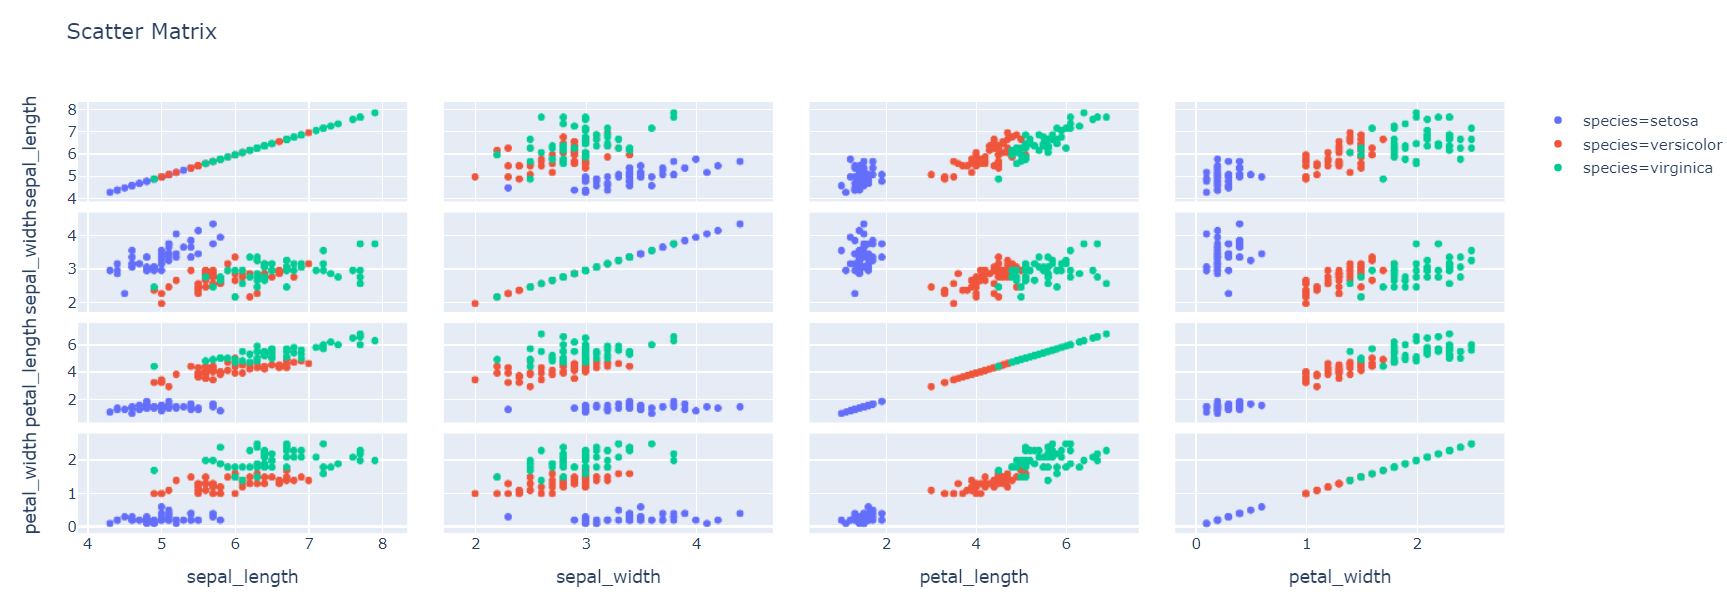

In [7]:
fig = px.density_contour(iris_df,
                         x='sepal_length',
                         y='sepal_width',
                         color='species',
                         marginal_x='rug', # x축 상단 : 자료 카펫을 깐다
                         marginal_y='histogram', # y축의 sepal_width에 대한 클래스별 히스토그램 -> 커서를 대면 히스토그램의 정보를 보여줌.
                         hover_data=iris_df.columns # 자료카펫에 커서를 대면 x축과 y축 자료뿐만 아니라 iris_df에 있는 모든 특성변수를 보여줌.
                         )

fig.show()

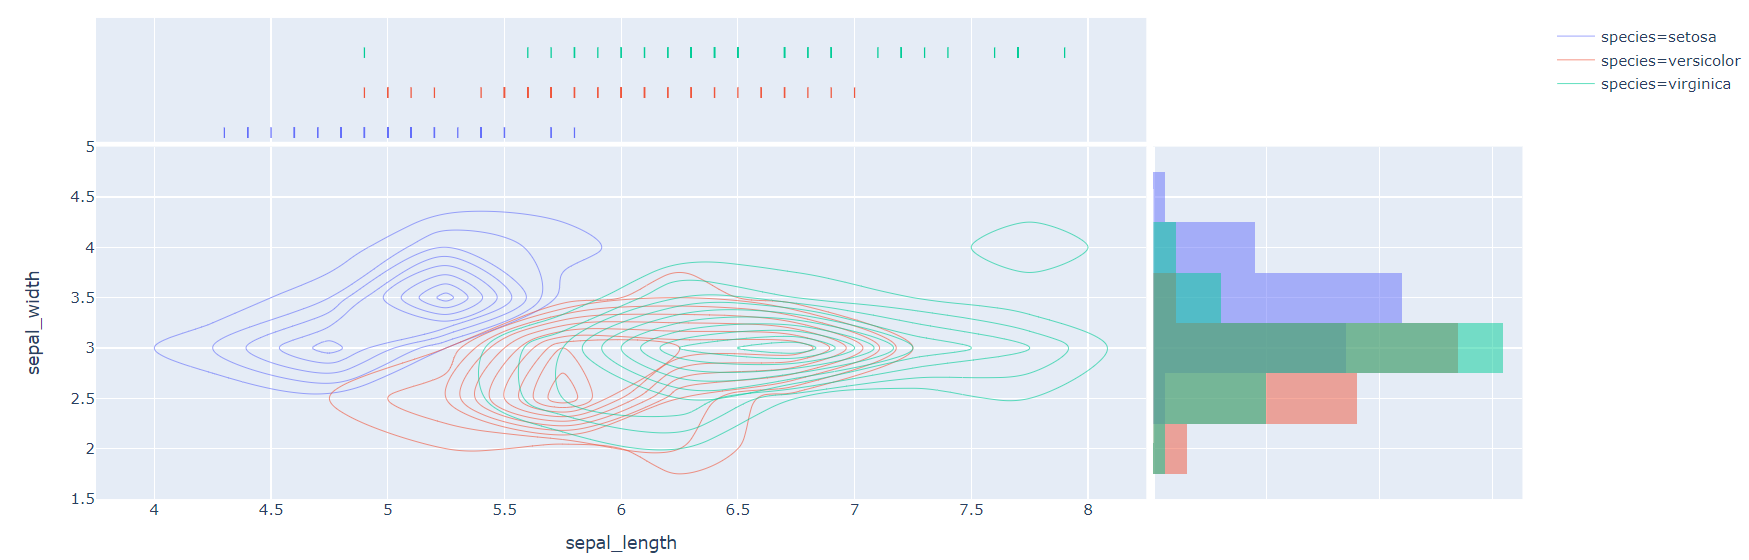

In [8]:
# px에 내장된 tips라는 데이터의 구조

df_tips = px.data.tips()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
fig = px.histogram(df_tips,
                   x='total_bill', # x축 : total_bill
                   y='tip', # y축 : total_bill의 구간별로 팁의 합
                   color='smoker',
                   marginal='rug',
                   hover_data=df_tips.columns
                   # 자료카펫을 깔고 있음.

                   # 히스토그램의 y축의 값을 0 ~ 1의 값으로 확률화하려면 histogram='probability'을 부여하면 됨.
                   )

fig.update_layout(title_text='Histogram', # Title 이름 : Histogram
                  title_x = 0.5 # title의 x축이 중간에 오도록 함.
                  )

fig.show()

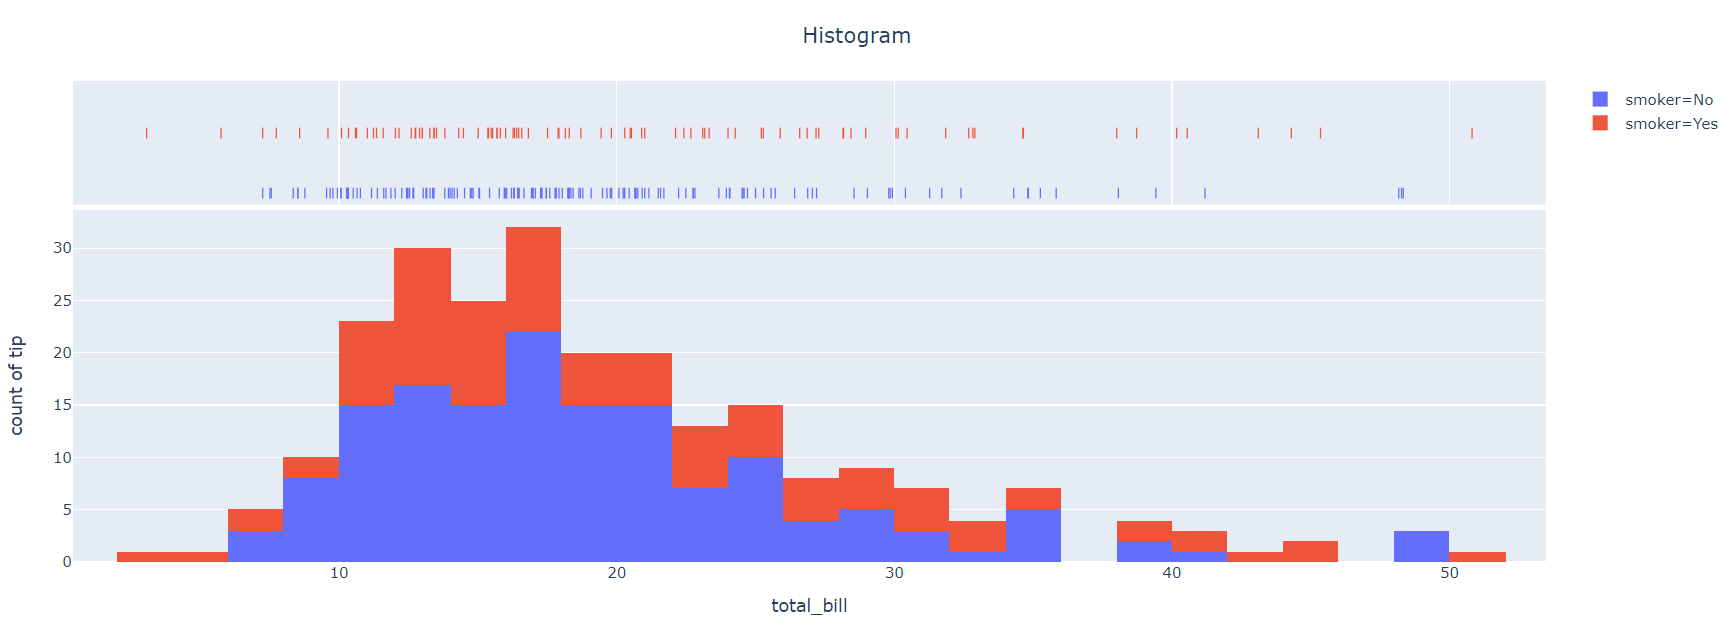

In [10]:
# Dineer와 Lunch 별로 팁에 대한 box-whisker 플롯을 성별로 제공하고 있음.

fig = px.box(df_tips,
             x='time',
             y='tip',
             color='sex'
             )

fig.update_layout(title_text='BOX',
                  title_x=0.5, # Title이 아예 그림 중간에 오도록
                  title_y=0.5, # Title이 아예 그림 중간에 오도록
                  title_font_size=30 # Title의 크기 조절
                  )

fig.show()

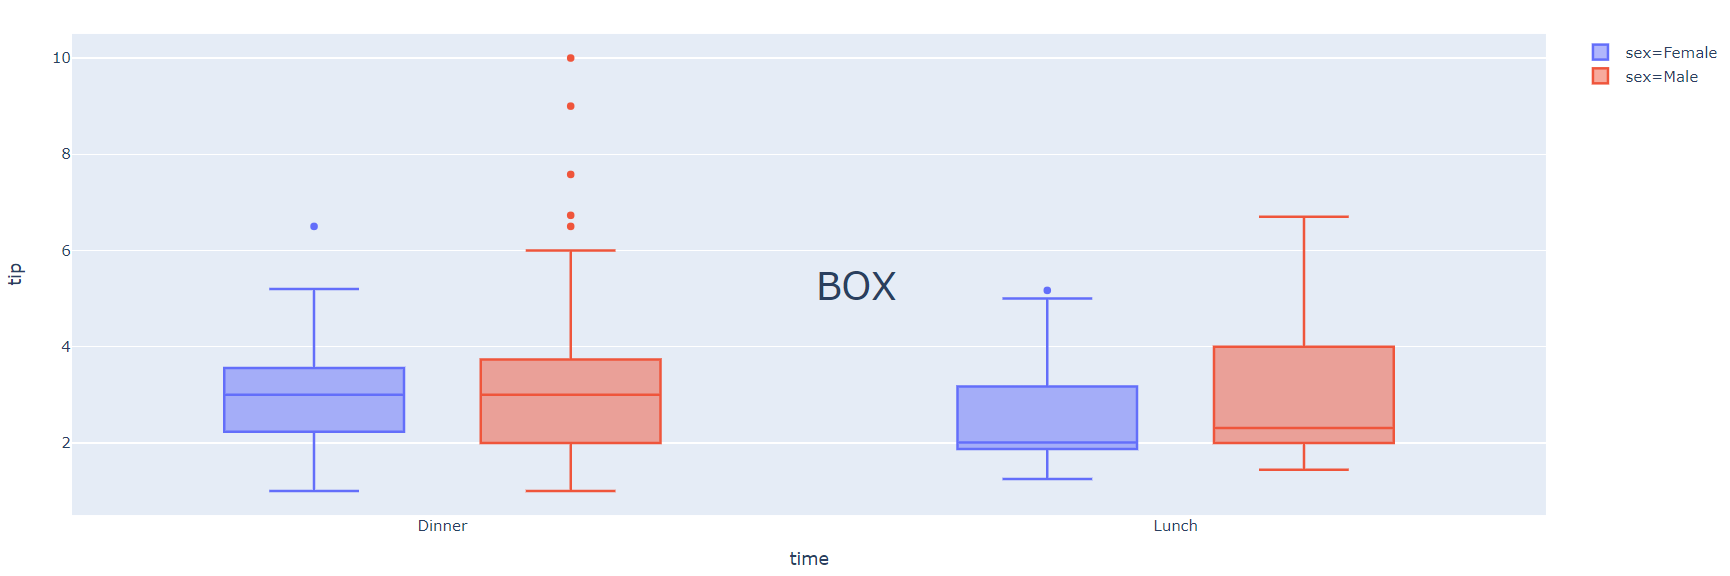

In [11]:
# violin -> 팁에 대한 분포함수와 분포함수 내에 box-whisker 플롯을 담배를 피우는지 여부에 따라 그리는 프로그램

fig = px.violin(df_tips,
                y='tip',
                x='sex',
                color='smoker',
                box=True,
                points='all', # 별도의 자료 scatter 플롯을 제공하게 하고 있음.
                hover_data=df_tips.columns
                )

fig.show()

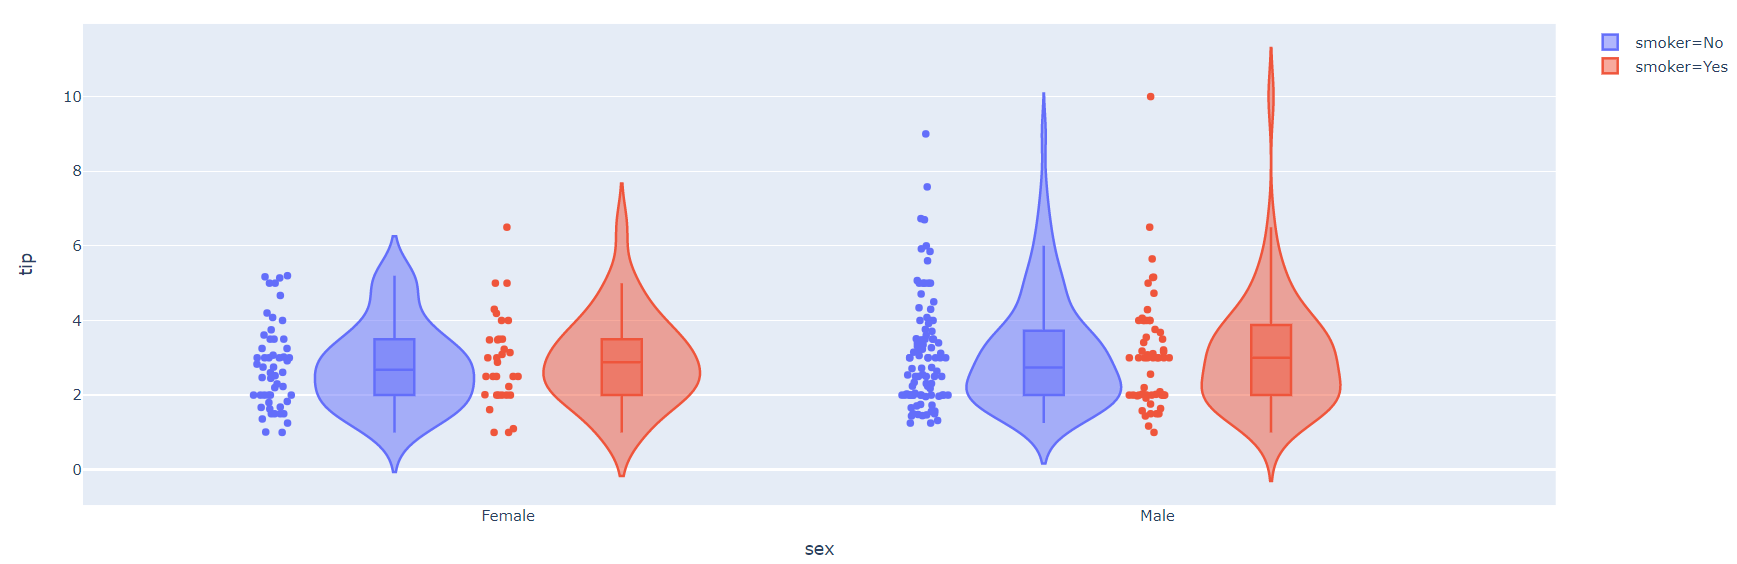

In [12]:
# 시계열자료의 시계열 플롯을 그리기 위한 plotly.express.line의 적용 사례
# gaminder 데이터를 내려받아 한국을 찾아서 연도별 기대수명 시계열 플롯을 보여주고 있음.

import numpy as np

df_pop = px.data.gapminder()
df_1 = np.unique(df_pop['country'])
print(df_1)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar

In [16]:
df_korea = df_pop.query("country=='Korea, Rep.'")
fig = px.line(df_korea,
              x='year',
              y='lifeExp',
              title='Life expectancy in Korea'
              )

fig.show()

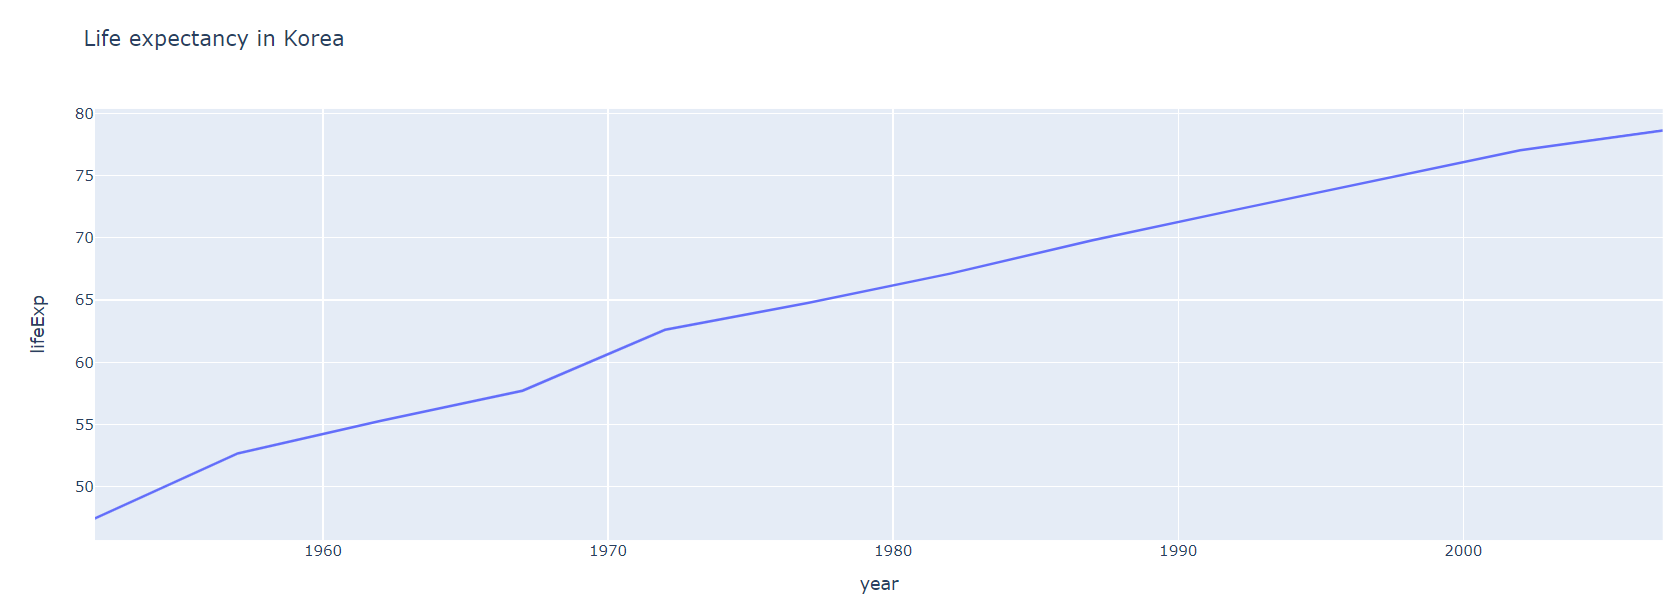

In [17]:
# 아시아 각국의 기대수명 시계열 플롯

df_asia = df_pop.query("continent=='Asia'")
fig=px.line(df_pop,
            x='year',
            y='lifeExp',
            color='country'
            )

fig.show()

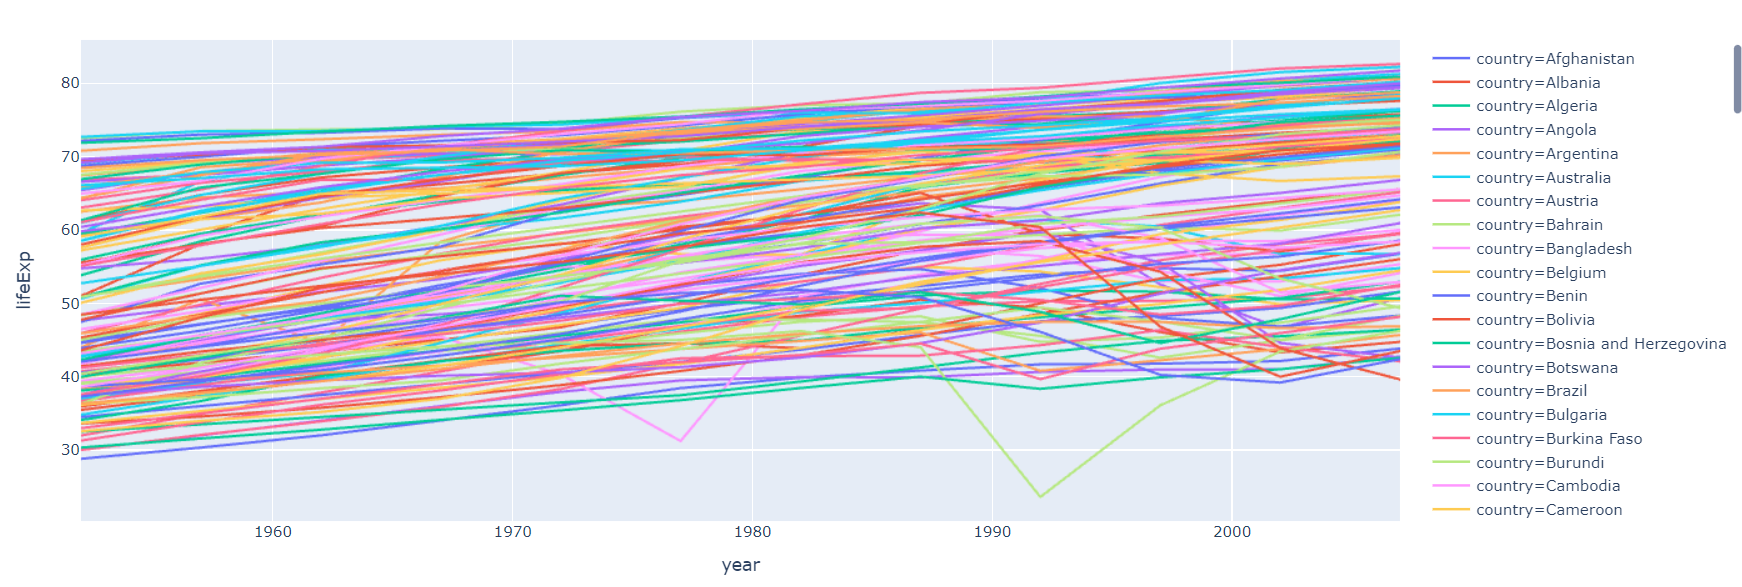